<a href="https://colab.research.google.com/github/Lourdes-Tolotto/ML/blob/main/Ej4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from scipy.stats import norm



In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
print(df.head())
print()
df.info()

# En este caso las columnas a eliminar no aportan ningun tipo de informacion para el analsis
df1 = df.drop(columns=['id', 'Unnamed: 32'])

features = df1.drop(columns='diagnosis')
target = df1['diagnosis']


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [67]:
from scipy.stats import normaltest

# Se analiza un conjunto de datos para determinar si tienen distribucion normal

def print_hist(data, data_name, ax):
    
    # Con este criterio se asume que los datos tienen una distribucion normal
    # si p_value>0.5
    stat, p_value = normaltest(data)
    
    if p_value > 0.05: 
      normal = True
      sns.histplot(data, kde=True, ax=ax, color='green')
      ax.set_title(data_name + ' (Posee D. Normal)')
    else: 
      normal = False
      sns.histplot(data, kde=True, ax=ax, color='red')
      ax.set_title(data_name + ' (NO Posee D. Normal)')
    
    return normal
    

In [68]:
# Imprime cada feature del dataset informando si tiene distribucion normal o no

def DF_analysis(df, fig_fils, fig_cols):
    
    features = df.columns
    fig, axes = plt.subplots(fig_fils, fig_cols, figsize=(20,20))
    plt.subplots_adjust(hspace=1, wspace=1.8)
    axes = axes.ravel()

    count = 0

    """for feature, ax in zip(features, axes):
        if feature != avoid_name :
          if print_hist(df[feature], feature, ax)==True : count = count + 1
    """
    for feature, ax in zip(features, axes):
        if print_hist(df[feature], feature, ax)==True : count = count + 1

    print("Features con distribución normal: ",count)

    fig.suptitle('Analisis de cada feature')
    #axes[1].remove()
    plt.show()


31
24

['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']

['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'texture_se' 'compactness_se' 'concave points_se' 'radius_worst'
 'texture_worst' 'perimeter_worst' 'area_worst' 'smoothness_worst'
 'compactness_worst' 'concavity_worst' 'concave points_worst'
 'symmetry_worst' 'fractal_dimension_worst']

Features con distribució

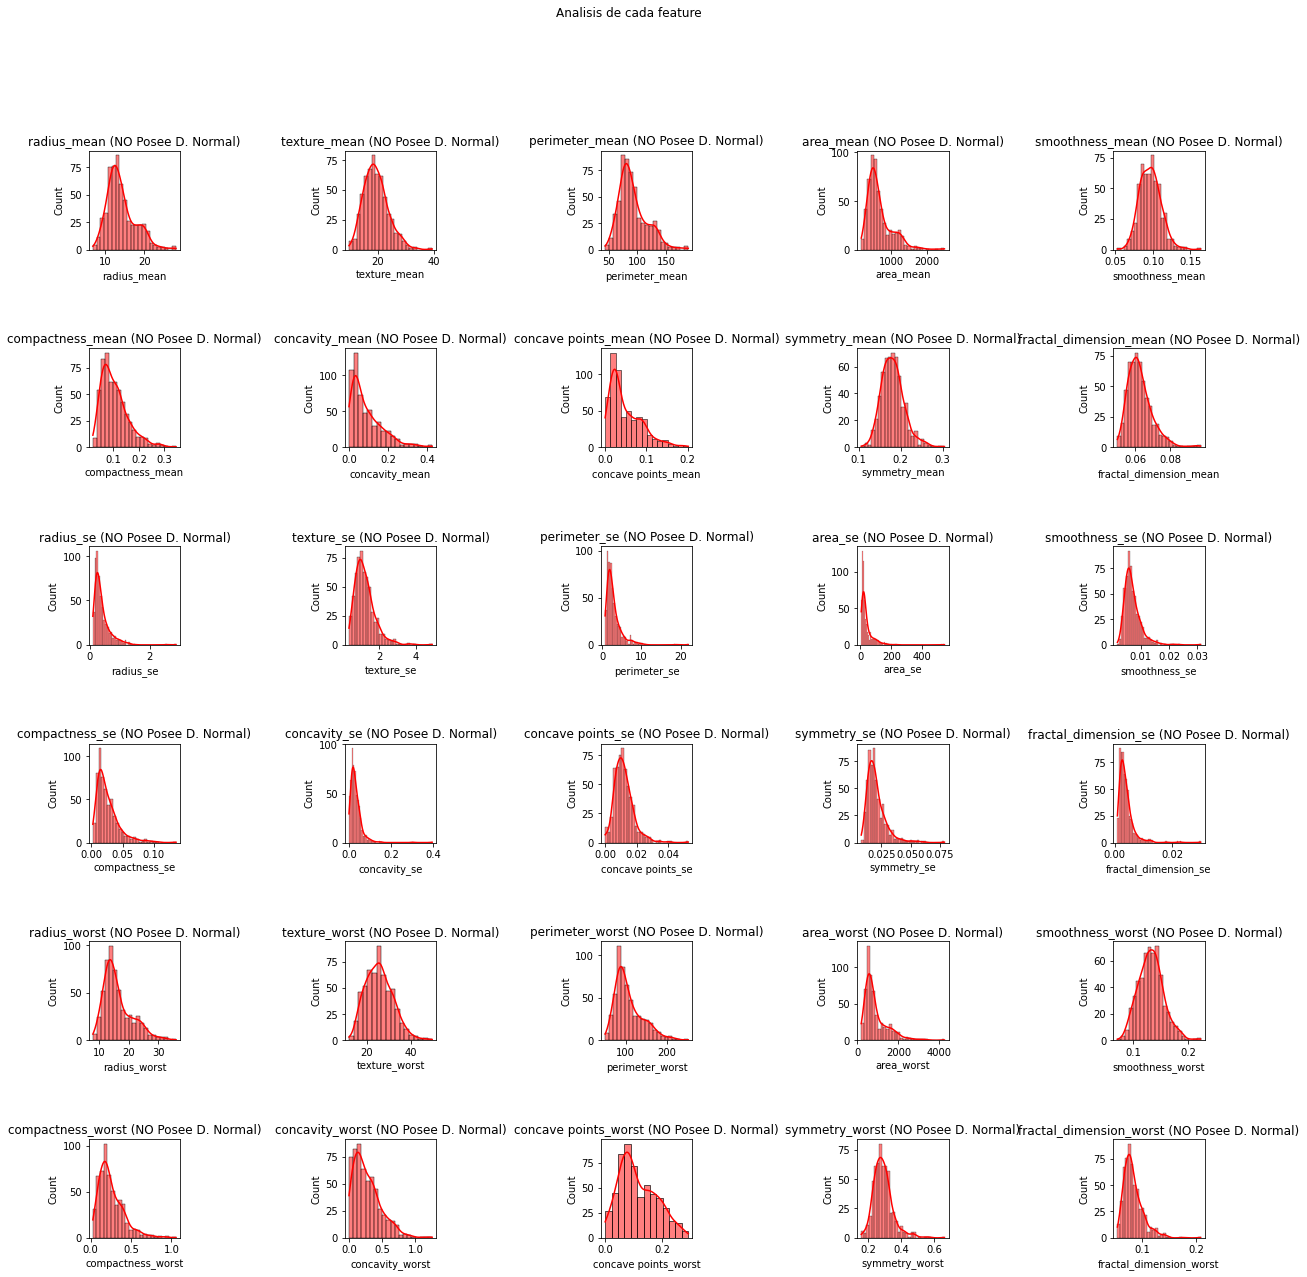

Features con distribución normal:  0


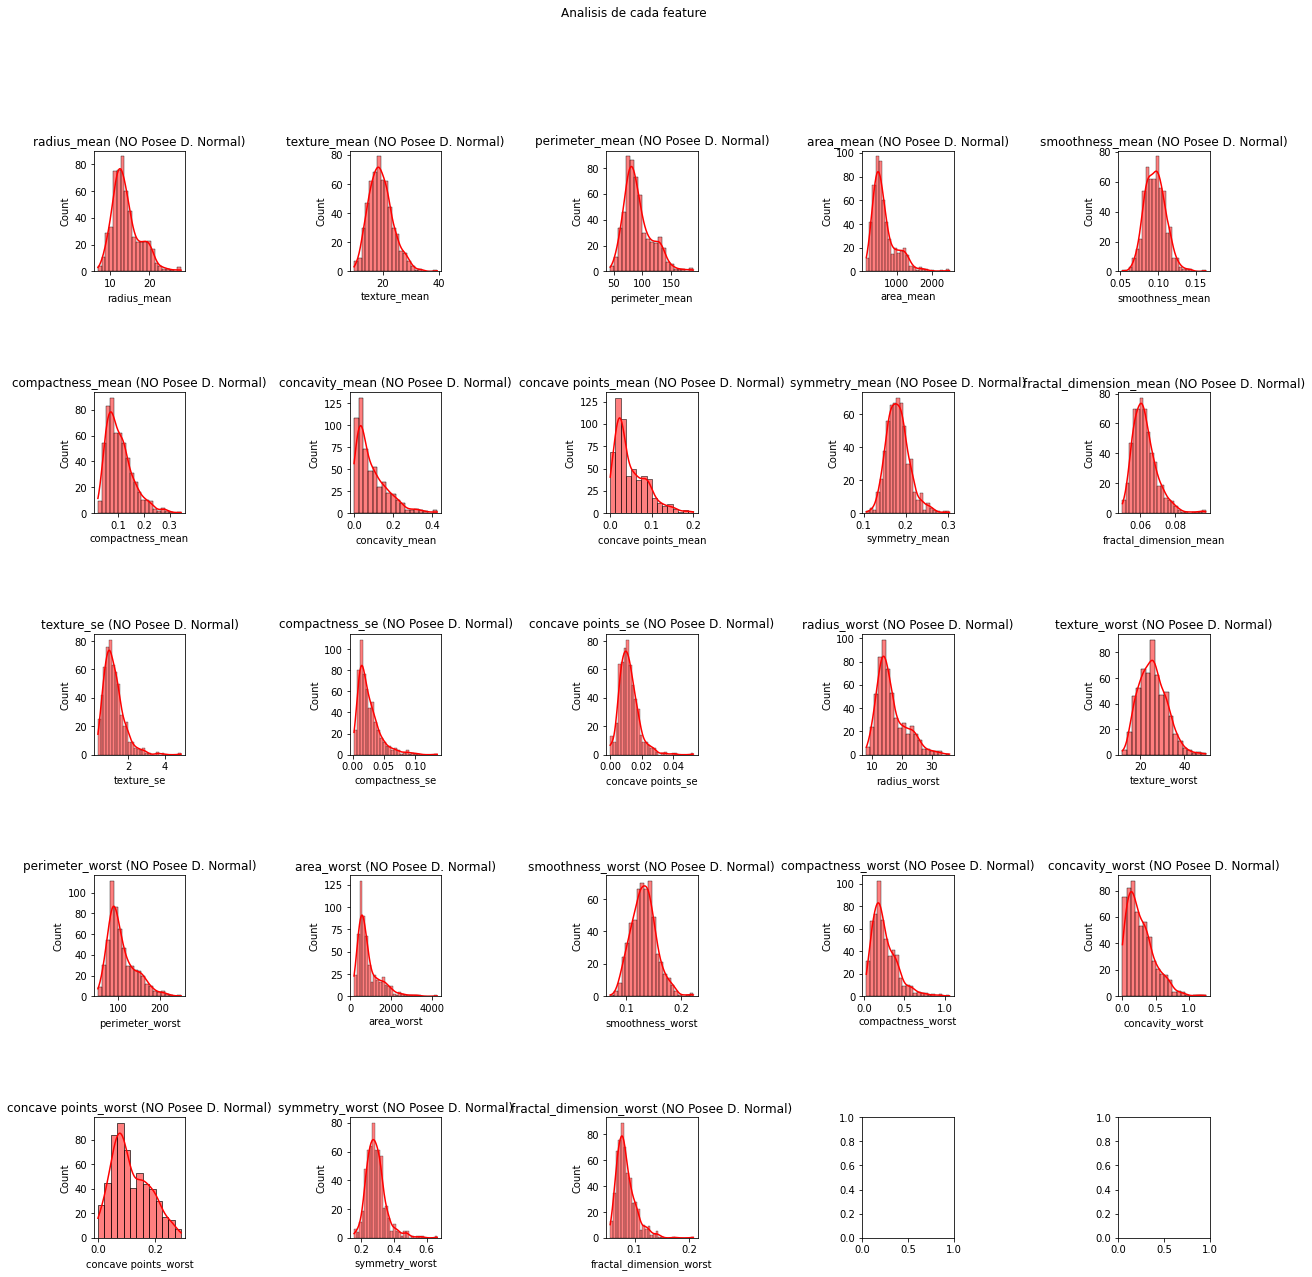

In [69]:
from scipy.stats import skew
from scipy.stats import percentileofscore

names = df1.columns.values
df_cut = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

# Se quitan los features que no aportan informacion al momento de realizar el analisis
# y que ademas, poseen variables cuyo tipo no permiten un analisis

df_cut.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Se eliminan los features que no son relevantes para el analisis

for i in range (1, len(df_cut.columns)):
  #print(names[i],': ',skew(df_cut[names[i]]))
  if abs(skew(df_cut[names[i]])) > 2: 
   df_cut.drop(names[i], axis = 1, inplace = True)

features_cut = df_cut.drop(columns = 'diagnosis')
names_cut = df_cut.columns.values
print()
print(len(names))
print(len(names_cut))
print()
print(names)
print()
print(names_cut)
print()

DF_analysis(features, 6, 5)
DF_analysis(features_cut, 5, 5)

In [70]:
print(features.shape)
df1.shape
print(target.name)

(569, 30)
diagnosis


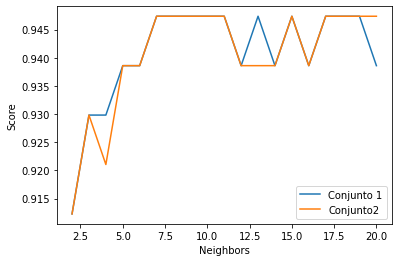

              precision    recall  f1-score   support

           B       0.92      0.98      0.95        66
           M       0.98      0.88      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                      test_size = 0.2, random_state = 20)

x_train1, x_test1, y_train1, y_test1 = train_test_split(features_cut, 
                                target, test_size = 0.2, random_state = 20)

n_amount = 20
n = np.arange(2,n_amount+1)
score = np.zeros(n_amount-1)
score2 = np.zeros(n_amount-1)

# Se analizan los dos conjuntos de datos tomando distintos valores de k

for k in range(2,n_amount+1):

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score[k-2] = knn.score(x_test, y_test)

  knn1 = KNeighborsClassifier(n_neighbors=k)
  knn1.fit(x_train1, y_train1)
  y_pred1 = knn1.predict(x_test1)
  score2[k-2] = knn1.score(x_test1, y_test1)

#print(k)
#print(n)
#print(len(score))
plt.plot(n,score)
plt.plot(n,score2)
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.legend(['Conjunto 1','Conjunto2'])

plt.show()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        66
           M       1.00      0.94      0.97        48

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



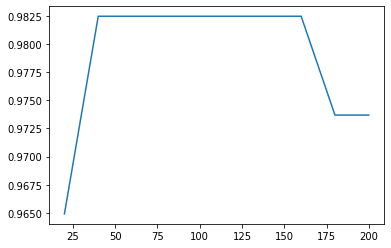

In [72]:
n_f = np.zeros(10)

for i in range(0,10):
  n_f[i] = 20*(i+1)

score = np.zeros(10)
aux = 0

for k in n_f:

  RF = RandomForestClassifier(random_state = 1 , n_estimators = int(k),
        criterion = 'entropy', n_jobs       = 2)     
  
  RF.fit(x_train, y_train)
  #y_pred_RF[aux]  = RF.predict(x_test)
  score[aux] = RF.score(x_test,y_test)
  aux = aux + 1

plt.plot(n_f,score)

# Evaluacion del modelo

y_pred_RF  = RF.predict(x_test) 
print(classification_report(y_test, y_pred_RF))

In [ ]:
# Utilizando kernel gaussiano

svc_gaussian = SVC(kernel='rbf')
svc_gaussian.fit(x_train, y_train)
y_pred_gaussian  = svc_gaussian.predict(x_test)

# Evaluacion del modelo

print(classification_report(y_test, y_pred_gaussian))

In [74]:
# Utilizando kernel sigmoid

print(classification_report(y_test, y_pred_gaussian))

svc_sig = SVC(kernel='sigmoid')
svc_sig.fit(x_train, y_train)
y_pred_sig  = svc_gaussian.predict(x_test)

# Evaluacion del modelo

print(classification_report(y_test, y_pred_sig))

              precision    recall  f1-score   support

           B       0.89      1.00      0.94        66
           M       1.00      0.83      0.91        48

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114

              precision    recall  f1-score   support

           B       0.89      1.00      0.94        66
           M       1.00      0.83      0.91        48

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



In [75]:
# Utilizando kernel polinomial

svc_gaussian = SVC(kernel='rbf')
svc_gaussian.fit(x_train, y_train)
y_pred_gaussian  = svc_gaussian.predict(x_test)

# Evaluacion del modelo

print(classification_report(y_test, y_pred_gaussian))

svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(x_train, y_train)
y_pred_poly = svc_poly.predict(x_test)

print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           B       0.89      1.00      0.94        66
           M       1.00      0.83      0.91        48

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114

              precision    recall  f1-score   support

           B       0.88      1.00      0.94        66
           M       1.00      0.81      0.90        48

    accuracy                           0.92       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114



In [76]:
# Utilizando kernel lineal

svc_lineal = SVC(kernel='linear')
svc_lineal.fit(x_train, y_train)
y_pred_lineal  = svc_gaussian.predict(x_test)

# Evaluacion del modelo

print(classification_report(y_test, y_pred_lineal))

              precision    recall  f1-score   support

           B       0.89      1.00      0.94        66
           M       1.00      0.83      0.91        48

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



In [77]:
SVM = svm.SVC()
SVM.fit(x_train, y_train)
y_predz = SVM.predict(x_test)

# Evaluacion del modelo

print(classification_report(y_test, y_predz))

              precision    recall  f1-score   support

           B       0.89      1.00      0.94        66
           M       1.00      0.83      0.91        48

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114

